In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_path = 'data/combined/'

float16_df: pd.DataFrame = pd.read_pickle(
    data_path + "amplitude_csi_dataframe_float16.pkl"
)
float32_df: pd.DataFrame = pd.read_pickle(data_path + "amplitude_csi_dataframe.pkl")

non_complex_columns = ["person", "position"]

float16_df = float16_df.drop(columns=non_complex_columns)
float32_df = float32_df.drop(columns=non_complex_columns)

difference_df = float32_df - float16_df

print(type(float16_df.iloc[0, 0]))
print(type(float32_df.iloc[0, 0]))
print(type(difference_df.iloc[0, 0]))
print(difference_df.head())

<class 'numpy.float16'>
<class 'numpy.float32'>
<class 'numpy.float32'>
        6         7         8         9         10        11        12   \
0 -0.199829  0.000000 -0.040283  0.192749  0.137695 -0.391724  0.454468   
1 -0.227173 -0.057251 -0.093506 -0.499268  0.415161  0.308716 -0.039917   
2  0.308228 -0.444092 -0.347412 -0.369019 -0.204346 -0.207764 -0.256226   
3 -0.028687 -0.117554  0.114380 -0.143555 -0.079956  0.042358 -0.259888   
4  0.240906  0.063782 -0.093689 -0.249512  0.167725 -0.402954 -0.482666   

        13        14        15   ...       241       242       243       244  \
0 -0.313965  0.416260 -0.375488  ...  0.000366  0.023499 -0.008461  0.012142   
1 -0.186646  0.038452 -0.086060  ...  0.026329  0.002609  0.001589 -0.010475   
2 -0.399658 -0.364868  0.216431  ...  0.014923 -0.000622 -0.000862 -0.013485   
3 -0.424316  0.106812 -0.247070  ...  0.010635 -0.003017  0.007809 -0.004501   
4 -0.226929 -0.444336  0.035889  ...  0.006706  0.001272  0.003454  0.003454 

In [9]:
print("Max values:\n", difference_df.max().max())
print("\nMean values:\n", difference_df.mean().mean(), float32_df.mean().mean())
print("\nStandard Deviation values:\n", difference_df.std().mean())

Max values:
 1.9951172

Mean values:
 0.0007763491 306.89804

Standard Deviation values:
 0.06525026


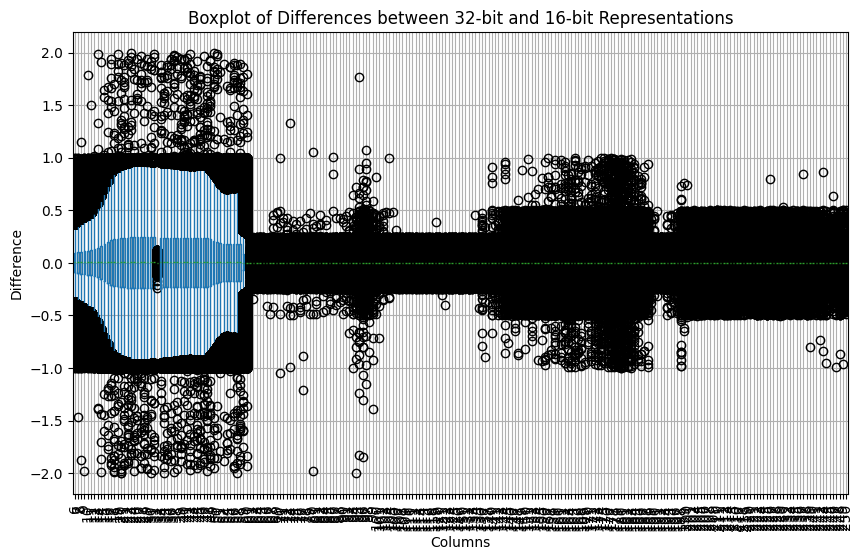

In [6]:
plt.figure(figsize=(14, 6))
difference_df.boxplot()
plt.title("Boxplot of Differences between 32-bit and 16-bit Representations")
plt.xlabel("Columns")
plt.ylabel("Difference")
plt.xticks(rotation=90)
plt.show()

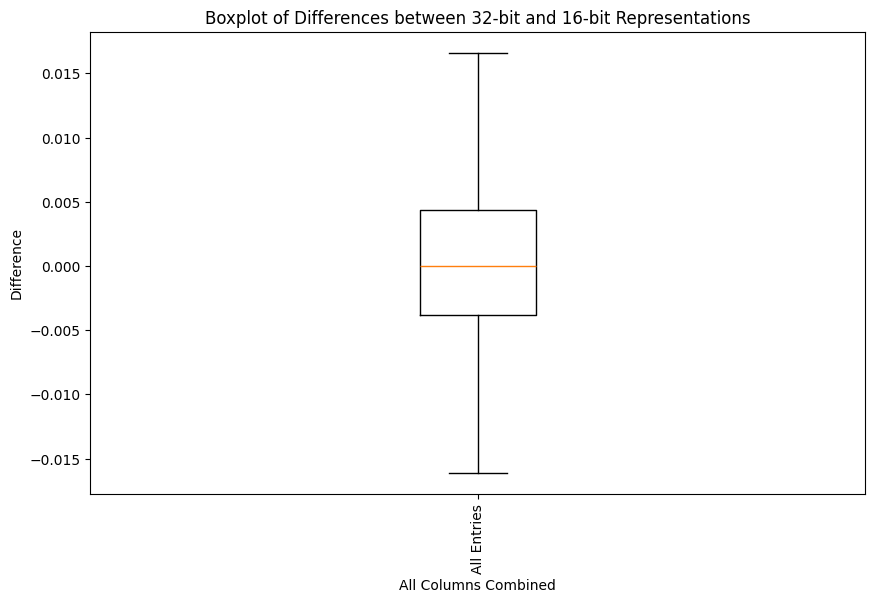

In [4]:
melted_df = difference_df.melt()

plt.figure(figsize=(10, 6))
plt.boxplot(melted_df["value"], showfliers=False)
plt.title("Boxplot of Differences between 32-bit and 16-bit Representations")
plt.xlabel("All Columns Combined")
plt.ylabel("Difference")
plt.xticks([1], ["All Entries"], rotation=90)

# max_outlier = melted_df["value"].max()
# min_outlier = melted_df["value"].min()
# plt.scatter([1], [max_outlier], color="red")
# plt.scatter([1], [min_outlier], color="red")

plt.show()